In [24]:
# Bedri Keskin bedri.keskin(at)gmail.com
# https://github.com/BedriKeskin/Galaxy-Classification
import itertools
import h5py
import keras
import numpy as np
import pandas as pd
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [25]:
Galaxy10 = h5py.File('Galaxy10.h5', 'r')
images = np.array(Galaxy10['images'])
labels = np.array(Galaxy10['ans'])
print("Toplam veri sayısı: " + str(images.shape[0]))

Toplam veri sayısı: 21785


In [26]:
# images, images_void, labels, labels_void = train_test_split(images, labels, test_size=0.1, train_size=0.9) # verinin bir kısmını kullanmak istersek
print("Kullanılan veri sayısı: " + str(images.shape[0]))
images_TrainValidation, images_test, labels_TrainValidation, labels_test = train_test_split(images, labels, test_size=0.1)
images_train, images_validation, labels_train, labels_validation = train_test_split(images_TrainValidation, labels_TrainValidation, test_size=0.2)
print("Train veri sayısı: " + str(images_train.shape[0]))
print("Validation veri sayısı: " + str(images_validation.shape[0]))
print("Test veri sayısı: " + str(images_test.shape[0]))

Kullanılan veri sayısı: 21785
Train veri sayısı: 15684
Validation veri sayısı: 3922
Test veri sayısı: 2179


In [27]:
""" # imajları diske kaydetme
for i in range(images.shape[0]):
    imagearray = images[i][:]
    imagefile = Image.fromarray(imagearray.astype('uint8'), 'RGB')
    imagefile.save(str(labels[i]) + "/" + str(i)+".jpg", "JPEG") """
""" # belli aralıktaki 12 imajı çizme 
plt.subplots(3, 4, figsize=(20, 20))
for i in range(100, 100+12):
    img_np = images[i]
    plt.subplot(3, 4, 1+i-100)
    plt.imshow(img_np)
plt.show() """

' # belli aralıktaki 12 imajı çizme \nplt.subplots(3, 4, figsize=(20, 20))\nfor i in range(100, 100+12):\n    img_np = images[i]\n    plt.subplot(3, 4, 1+i-100)\n    plt.imshow(img_np)\nplt.show() '

In [28]:
epochs = 10
batch_size = 1000
inputShape = (69, 69, 3)

In [29]:
# Model1
model = Sequential()
model.add(Flatten(input_shape=inputShape))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

In [30]:
"""
# Model2
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=inputShape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
"""
"""
# Model3
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(69, 69, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="relu"))
"""

'\n# Model3\nmodel = Sequential()\nmodel.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(69, 69, 3)))\nmodel.add(MaxPool2D())\n\nmodel.add(Conv2D(32, 3, padding="same", activation="relu"))\nmodel.add(MaxPool2D())\n\nmodel.add(Conv2D(64, 3, padding="same", activation="relu"))\nmodel.add(MaxPool2D())\nmodel.add(Dropout(0.4))\n\nmodel.add(Flatten())\nmodel.add(Dense(128, activation="relu"))\nmodel.add(Dense(10, activation="relu"))\n'

In [31]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["acc"])
model.summary()
# model.save(model, save_format="h5") # modeli diske kaydetme

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 14283)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               1428400   
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 1,433,960
Trainable params: 1,433,960
No

In [32]:
history = model.fit(images_train, labels_train, epochs=epochs, validation_data=[images_validation, labels_validation])
# (eval_loss, eval_accuracy) = model.evaluate(images_validation, labels_validation, batch_size=batch_size, verbose=1)

Epoch 1/10
491/491 [==============================] - 4s 8ms/step - loss: 110.8874 - acc: 0.2617 - val_loss: 17.2360 - val_acc: 0.2955
Epoch 2/10
491/491 [==============================] - 4s 9ms/step - loss: 31.1818 - acc: 0.2828 - val_loss: 8.3230 - val_acc: 0.3682
Epoch 3/10
491/491 [==============================] - 5s 11ms/step - loss: 11.2215 - acc: 0.2830 - val_loss: 3.9512 - val_acc: 0.3845
Epoch 4/10
491/491 [==============================] - 8s 17ms/step - loss: 4.8760 - acc: 0.2992 - val_loss: 2.0691 - val_acc: 0.3804
Epoch 5/10
491/491 [==============================] - 7s 15ms/step - loss: 2.6454 - acc: 0.3112 - val_loss: 1.6773 - val_acc: 0.3962
Epoch 6/10
491/491 [==============================] - 6s 12ms/step - loss: 2.1185 - acc: 0.3158 - val_loss: 1.8026 - val_acc: 0.3139
Epoch 7/10
491/491 [==============================] - 7s 15ms/step - loss: 1.9638 - acc: 0.3249 - val_loss: 1.8714 - val_acc: 0.2963
Epoch 8/10
491/491 [==============================] - 6s 12ms/step

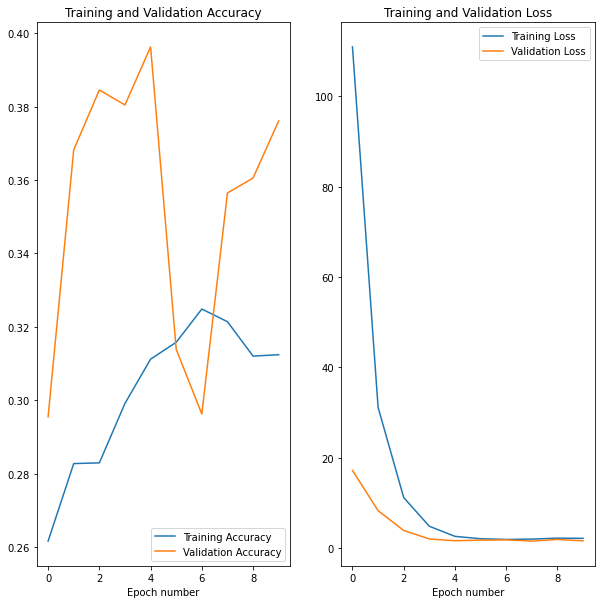

In [33]:
# Training ve validation grafiği
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history["acc"], label='Training Accuracy')
plt.plot(range(epochs), history.history["val_acc"], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch number")
plt.subplot(1, 2, 2)
plt.plot(range(epochs), history.history["loss"], label='Training Loss')
plt.plot(range(epochs), history.history["val_loss"], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epoch number")
plt.show()

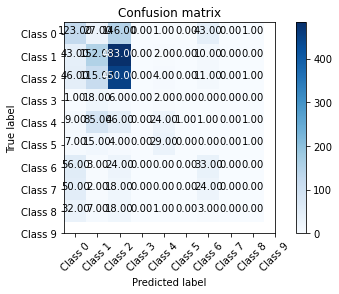

In [34]:
predictions = model.predict(images_test)
confusion_matrix = confusion_matrix(labels_test, pd.DataFrame(predictions).idxmax(axis=1))
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
# Confusion matrix grafiği
plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], ".2f"), horizontalalignment="center", color="white" if confusion_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()